In [11]:
from net2rank.p4c_tools import make_network, network_cluster, function_enrichment
from net2rank.p4c_tools import parse_enrichment_results,select_proteins_by_enrichment
from net2rank.p4c_tools import load_protein_data, make_network_plot

import py4cytoscape as p4c
import pandas as pd

import networkx as nx
p4c.import_visual_styles('../data/Revelen_style.xml')

['Revelen']

In [17]:
df_protein_category = load_protein_data(
    predictions_file='../results/test_results/atopic_dermatitis/atopic_dermatitis_test_prediction_results.tsv',
    train_file='../data/train/atopic_dermatitis.integrated.tsv',
    train_file_type='pvalue',
    pos_size=1000,
    human_network_emb='../data/9606.node2vec64.h5',
    threshold=0.1
)

# df_protein_category = pd.read_csv('../results/test_results/atopic_dermatitis/atopic_dermatitis_whole_prediction_results.tsv', sep='\t')
# # sort by predicted score and take top 200
# df_protein_category = df_protein_category.sort_values(by='predicted_score', ascending=False).iloc[:500, :]

suid = make_network(
    proteins=df_protein_category['protein'].tolist(),
    network_name='atopic_dermatitis_main_network',
    cutoff=0.7)



In [18]:
p4c.set_current_network(network=suid)

# Get network data
all_nodes = p4c.get_all_nodes()
all_edges = p4c.get_all_edges()

# Create NetworkX graph
G = nx.Graph()

# Add nodes
G.add_nodes_from(all_nodes)

for edge in all_edges:
    source,target = edge.split(' (pp) ')
    G.add_edge(source, target)

connected_components = list(nx.connected_components(G))

# Get the largest component
largest_component = max(connected_components, key=len)
largest_component_nodes = list(largest_component)
print(f'Largest component has {len(largest_component_nodes)} nodes')

# make a new network and do clustering
suid = make_network(
    proteins=largest_component_nodes,
    network_name='atopic_dermatitis_largest_component_network',
    cutoff=0.7
)

Largest component has 145 nodes


In [19]:
cluster_result = network_cluster(suid, inflation_parameter=4)
cluster_proteins = [[node_dict['name'] for node_dict in cluster_result['clusters'][0]['nodes']]]
cluster_proteins.append([node_dict['name'] for node_dict in cluster_result['clusters'][1]['nodes']])
enrichment_results = [function_enrichment(cluster_proteins[0])]
enrichment_results.append(function_enrichment(cluster_proteins[1]))

In [20]:
parse_enrichment_results(enrichment_results[0],category='Process')

,term,description,fdr,num_genes,num_genes_background,category
0,GO:0006955,Immune response,2.940000e-35,41,1321,Process
1,GO:0019221,Cytokine-mediated signaling pathway,8.650000e-33,29,369,Process
2,GO:0002376,Immune system process,3.690000e-29,42,2121,Process
3,GO:0034097,Response to cytokine,2.180000e-28,32,804,Process
4,GO:0071345,Cellular response to cytokine stimulus,2.180000e-28,31,711,Process
...,...,...,...,...,...,...
368,GO:0031323,Regulation of cellular metabolic process,3.910000e-02,25,5681,Process
369,GO:0002833,Positive regulation of response to biotic stim...,4.100000e-02,4,187,Process
370,GO:0071636,Positive regulation of transforming growth fac...,4.170000e-02,2,20,Process
371,GO:0032677,Regulation of interleukin-8 production,4.390000e-02,3,86,Process


/Users/pst325/Documents/zs_work/net2rank/.venv/lib/python3.11/site-packages/py4cytoscape/tables.py:485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset[col] = col_val


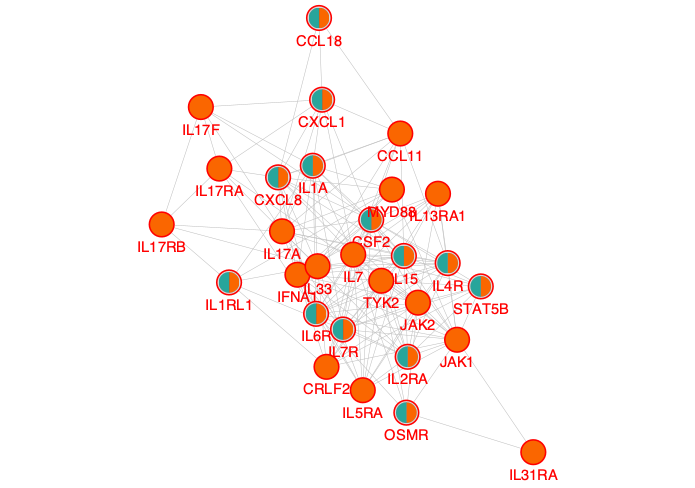

In [23]:
suid = make_network_plot(
    df_protein_category=df_protein_category,
    enrichment_results=enrichment_results[0],
    selected_term='GO:0019221', # Cytokine-mediated signaling pathway
    disease_name='atopic_dermatitis',
)
p4c.layout_network('force-directed', network=suid)
p4c.notebook_export_show_image()

In [21]:
parse_enrichment_results(enrichment_results[1],category='Process')

,term,description,fdr,num_genes,num_genes_background,category
0,GO:0070098,Chemokine-mediated signaling pathway,3.670000e-28,14,82,Process
1,GO:0060326,Cell chemotaxis,1.780000e-26,15,210,Process
2,GO:0048247,Lymphocyte chemotaxis,9.250000e-17,9,51,Process
3,GO:0006955,Immune response,2.820000e-15,15,1321,Process
4,GO:0030593,Neutrophil chemotaxis,2.820000e-15,9,80,Process
...,...,...,...,...,...,...
67,GO:0045662,Negative regulation of myoblast differentiation,2.580000e-02,2,28,Process
68,GO:0036230,Granulocyte activation,3.480000e-02,2,33,Process
69,GO:0048522,Positive regulation of cellular process,4.230000e-02,11,5584,Process
70,GO:0051495,Positive regulation of cytoskeleton organization,4.430000e-02,3,195,Process


/Users/pst325/Documents/zs_work/net2rank/.venv/lib/python3.11/site-packages/py4cytoscape/tables.py:485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset[col] = col_val


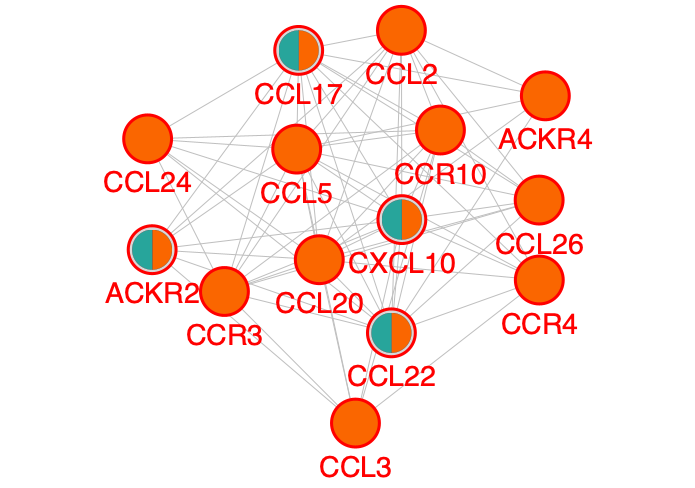

In [22]:
suid = make_network_plot(
    df_protein_category=df_protein_category,
    enrichment_results=enrichment_results[1],
    selected_term='GO:0070098', # chemokine-mediated signaling pathway
    disease_name='atopic_dermatitis',
)
p4c.layout_network('force-directed', network=suid)
p4c.notebook_export_show_image()